In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error
import sklearn.neural_network as net

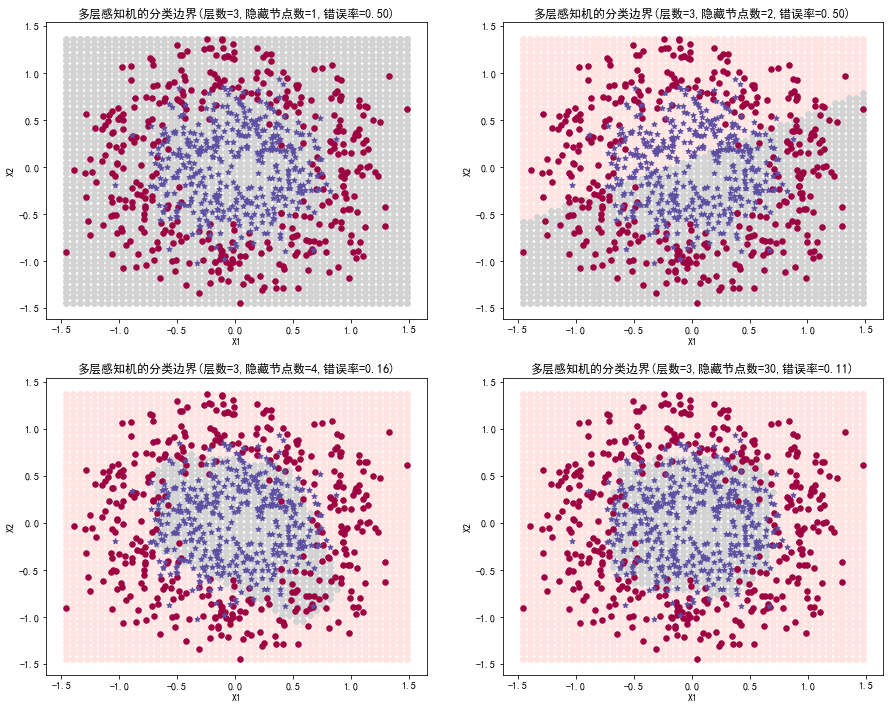

In [2]:
N=800
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
unique_lables=set(Y)
X1,X2= np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),50),np.linspace(X[:,1].min(),X[:,1].max(),50))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
colors=plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
markers=['o','*']
for hn,H,L in [(1,0,0),(2,0,1),(4,1,0),(30,1,1)]:
    NeuNet=net.MLPClassifier(hidden_layer_sizes=(hn,),random_state=123)
    NeuNet.fit(X,Y)
    Y0=NeuNet.predict(X0)
    axes[H,L].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    axes[H,L].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H,L].set_xlabel('X1')
    axes[H,L].set_ylabel('X2')
    axes[H,L].set_title('多层感知机的分类边界(层数=%d,隐藏节点数=%d,错误率=%.2f)'%(NeuNet.n_layers_,hn,1-NeuNet.score(X,Y)))
    for k,col,m in zip(unique_lables,colors,markers):
        axes[H,L].scatter(X[Y==k,0],X[Y==k,1],color=col,s=30,marker=m)    

说明：这里基于模拟数据，直观展示：通过多个隐藏节点的空间变换作用，多层感知机能够很好地解决非线性分类预测问题。
1、利用MLPClassifier实现多层感知机分类。其中，参数hidden_layer_sizes用于指定隐藏层和隐藏节点个数。如：(100,20)表示有两个隐藏层分别包含100和20个隐藏节点。
2、MLPClassifier默认的激活函数为ReLU函数，最大迭代次数为200，三层网络（一个隐藏层包含100个隐藏节点）。采用Adam随机梯度优化算法。可指定采用SGD算法。